1.1424649785434575


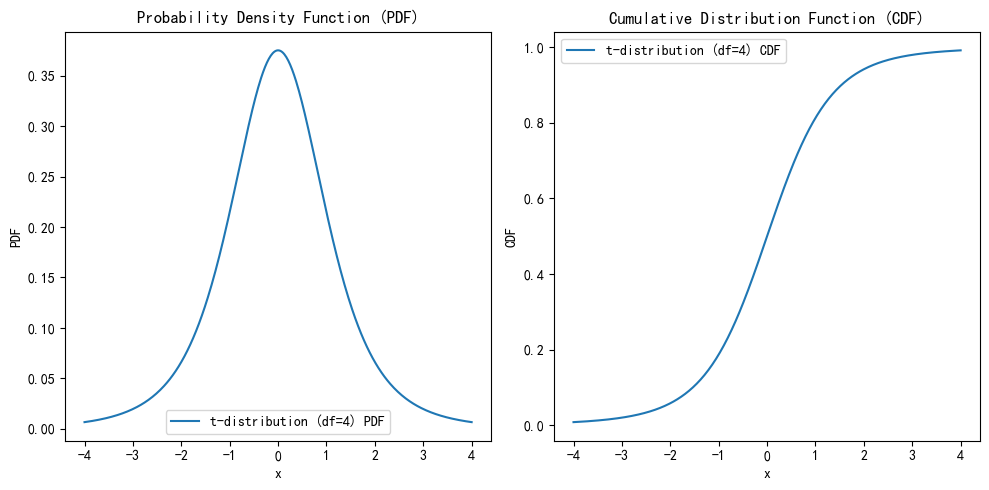

In [45]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号  

from scipy.stats import t

# 自由度
df = 4

# 生成 t 分布的 x 值
x = np.linspace(-4, 4, 400)

# 计算 t 分布的概率密度函数 (PDF)
pdf = t.pdf(x, df)

# 计算 t 分布的累积分布函数 (CDF)
cdf = t.cdf(x, df)

zhixindu=0.683
t_value=t.ppf((1+zhixindu)/2,df)
print(t_value)

# 绘制概率密度函数 (PDF) 和累积分布函数 (CDF)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, pdf, label=f't-distribution (df={df}) PDF')
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, cdf, label=f't-distribution (df={df}) CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('CDF')
plt.legend()

plt.tight_layout()
plt.show()


In [46]:
def calculate_uncertainty(measurements):
    # 计算样本标准差
    sample_std_deviation = np.std(measurements, ddof=1)  # 使用 ddof=1 表示计算样本标准差
    mean=np.mean(measurements)
    # 计算测量值总数
    N = len(measurements)
    
    # 计算 t 分布的不确定度
    uncertainty = (t_value * sample_std_deviation) / np.sqrt(N)
    
    return  mean,uncertainty

,滤波时间,1,2,3,4,5
0,0.5,48.59,48.61,48.65,48.67,48.52
1,1.0,41.34,41.35,41.20,41.32,41.39
2,2.0,32.46,32.55,32.35,32.51,32.44
3,3.0,28.75,28.63,28.77,28.72,28.65
4,4.0,24.46,24.47,24.45,24.52,24.40
5,5.0,20.51,20.71,20.67,20.72,20.64
6,6.0,17.22,17.07,17.13,17.28,17.31


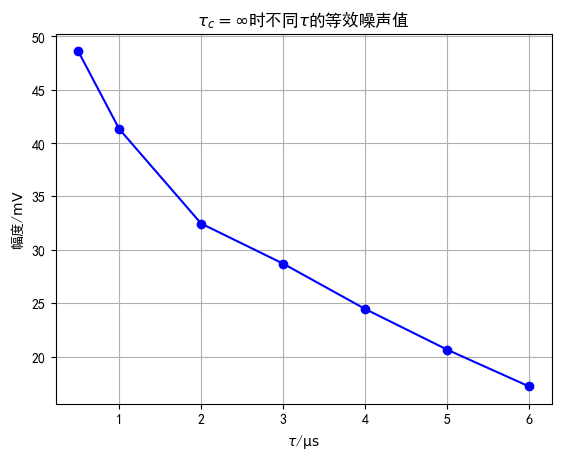

In [47]:
import pandas as pd

# 读取 Excel 文件
df = pd.read_excel('data.xlsx',sheet_name='tauinf')
display(df)
# 读取单列
column_name = '滤波时间'  # 替换为你的列名
single_column = df[column_name]
tau=np.array(single_column.values,dtype=float)
# # 读取多列
columns_to_read = [1, 2,3,4,5]  # 替换为你的列名列表
multiple_columns = df[columns_to_read]
v=np.array(multiple_columns.values,dtype=float)
vmean=np.mean(v,axis=1)
vstd=np.std(v,axis=1,ddof=1)
vbqdd=(t_value * vstd) / np.sqrt(v.shape[0])

plt.errorbar(tau, vmean, yerr=vbqdd, fmt='-o',color='blue')

# 添加标签和标题
plt.xlabel('$\\tau$/$\\mathrm{\\mu s}$')
plt.ylabel('幅度/$\mathrm{mV}$')
plt.title('$\\tau_c=\infty$时不同$\\tau$的等效噪声值')
plt.grid()

# 添加图例
# plt.legend()
plt.savefig('pic/noninput_noise_taucinfty.pdf', bbox_inches='tight')
# 显示图形
plt.show()




,滤波时间,1,2,3,4,5
0,0.5,0.269,0.268,0.268,0.270,0.269
1,1.0,0.332,0.330,0.331,0.332,0.330
2,2.0,0.406,0.409,0.406,0.409,0.410
3,3.0,0.444,0.442,0.439,0.441,0.443
4,4.0,0.523,0.519,0.517,0.515,0.519
5,5.0,0.586,0.574,0.578,0.577,0.574
6,6.0,0.644,0.648,0.652,0.664,0.647


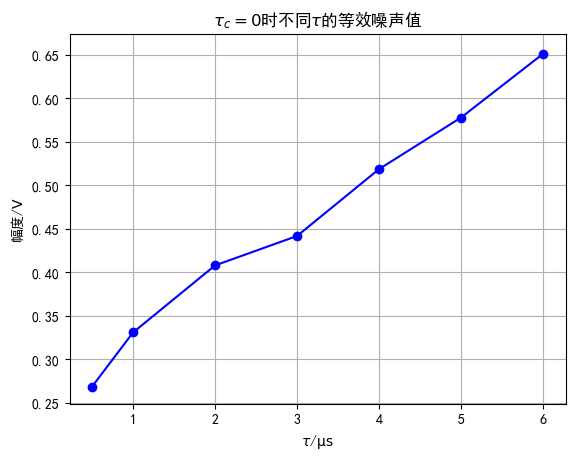

In [48]:
import pandas as pd

# 读取 Excel 文件
df = pd.read_excel('data.xlsx',sheet_name='tau0')
display(df)
# 读取单列
column_name = '滤波时间'  # 替换为你的列名
single_column = df[column_name]
tau=np.array(single_column.values,dtype=float)
# # 读取多列
columns_to_read = [1, 2,3,4,5]  # 替换为你的列名列表
multiple_columns = df[columns_to_read]
v=np.array(multiple_columns.values,dtype=float)
vmean=np.mean(v,axis=1)
vstd=np.std(v,axis=1,ddof=1)
vbqdd=(t_value * vstd) / np.sqrt(v.shape[0])

plt.errorbar(tau, vmean, yerr=vbqdd, fmt='-o',color='blue')

# 添加标签和标题
plt.xlabel('$\\tau$/$\\mathrm{\\mu s}$')
plt.ylabel('幅度/$\mathrm{V}$')
plt.title('$\\tau_c=0$时不同$\\tau$的等效噪声值')
plt.grid()
# 添加图例
# plt.legend()
plt.savefig('pic/noninput_noise_tauc0.pdf', bbox_inches='tight')
# 显示图形
plt.show()




,滤波时间,1,2,3,4,5,mean
0,0.5,0.112,0.111,0.111,NaN,NaN,0.111333
1,1.0,0.114,0.113,0.114,NaN,NaN,0.113667
2,2.0,0.175,0.174,0.172,NaN,NaN,0.173667
3,3.0,0.223,0.224,0.221,0.225,0.222,0.223000
4,4.0,0.243,0.240,0.241,NaN,NaN,0.241333
5,5.0,0.332,0.333,0.334,0.329,0.339,0.333400
6,6.0,0.364,0.368,0.362,0.364,0.364,0.364400


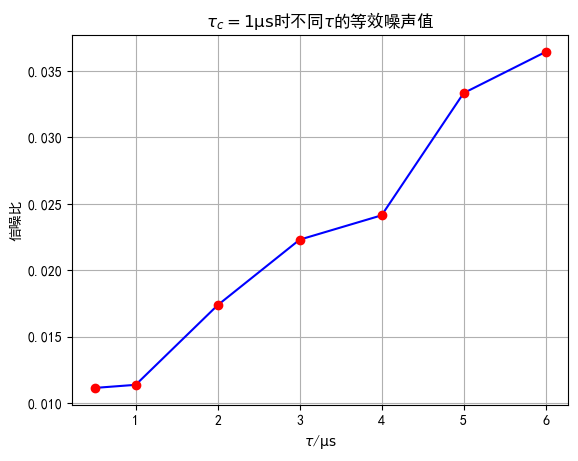

In [49]:
import pandas as pd

# 读取 Excel 文件
df = pd.read_excel('data.xlsx',sheet_name='tauc1')
display(df)

tau=np.array(df['滤波时间'].values,dtype=float)
vmean=np.array(df['mean'].values,dtype=float)
vmean=vmean/10

plt.plot(tau, vmean,'-',color='blue')
plt.plot(tau, vmean,'o',color='red')


# 添加标签和标题
plt.xlabel('$\\tau$/$\\mathrm{\\mu s}$')
plt.ylabel('信噪比')
plt.title('$\\tau_c=1\\mathrm{\mu s}$时不同$\\tau$的等效噪声值')
plt.grid()
# 添加图例
# plt.legend()
plt.savefig('pic/noise_tauc1.pdf', bbox_inches='tight')
# 显示图形
plt.show()


,滤波时间,1,2,3,4,5,mean
0,0.5,0.180,0.178,0.179,NaN,NaN,0.179000
1,1.0,0.143,0.143,0.143,NaN,NaN,0.143000
2,2.0,0.192,0.190,0.192,NaN,NaN,0.191333
3,3.0,0.239,0.237,0.232,0.231,0.235,0.234800
4,4.0,0.256,0.271,0.254,NaN,NaN,0.260333
5,5.0,0.337,0.354,0.350,0.342,0.351,0.346800
6,6.0,0.372,0.372,0.376,0.378,0.369,0.373400


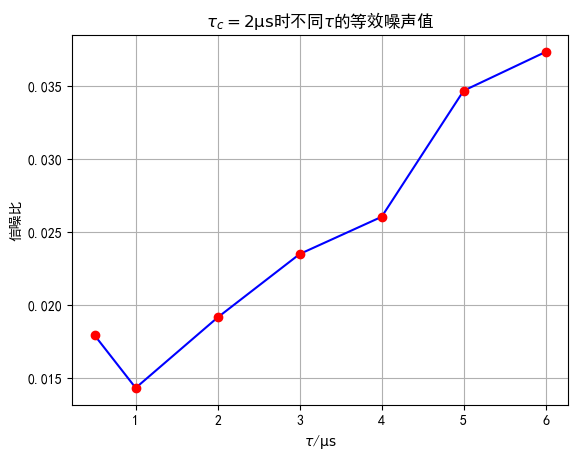

In [50]:
import pandas as pd

# 读取 Excel 文件
df = pd.read_excel('data.xlsx',sheet_name='tauc2')
display(df)

tau=np.array(df['滤波时间'].values,dtype=float)
vmean=np.array(df['mean'].values,dtype=float)
vmean=vmean/10

plt.plot(tau, vmean,'-',color='blue')
plt.plot(tau, vmean,'o',color='red')

# 添加标签和标题
plt.xlabel('$\\tau$/$\\mathrm{\\mu s}$')
plt.ylabel('信噪比')
plt.title('$\\tau_c=2\\mathrm{\mu s}$时不同$\\tau$的等效噪声值')
plt.grid()
# 添加图例
# plt.legend()
plt.savefig('pic/noise_tauc2.pdf', bbox_inches='tight')
# 显示图形
plt.show()


,滤波时间,1,2,3,4,5,mean
0,0.5,0.341,0.340,0.341,NaN,NaN,0.340667
1,1.0,0.217,0.218,0.218,NaN,NaN,0.217667
2,2.0,0.232,0.234,0.231,NaN,NaN,0.232333
3,3.0,0.434,0.442,0.446,0.454,0.452,0.445600
4,4.0,0.264,0.262,0.261,NaN,NaN,0.262333
5,5.0,0.345,0.351,0.348,0.348,0.355,0.349400
6,6.0,0.371,0.375,0.372,0.368,0.373,0.371800


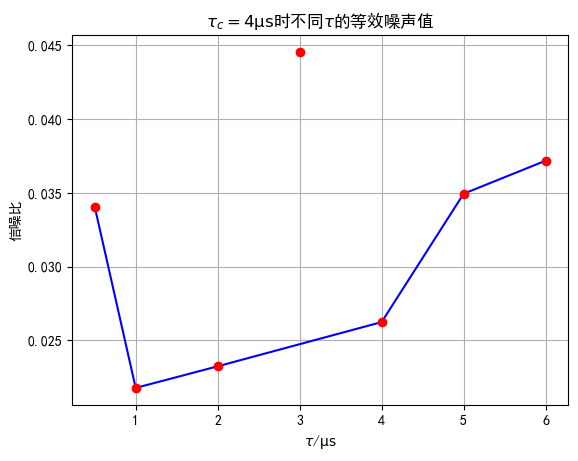

In [51]:
import pandas as pd

# 读取 Excel 文件
df = pd.read_excel('data.xlsx',sheet_name='tauc4')
display(df)

tau=np.array(df['滤波时间'].values,dtype=float)
vmean=np.array(df['mean'].values,dtype=float)
vmean=vmean/10

plt.plot(np.delete(tau,3), np.delete(vmean,3), '-',color='blue')

plt.plot(tau, vmean,'o',color='red')

# 添加标签和标题
plt.xlabel('$\\tau$/$\\mathrm{\\mu s}$')
plt.ylabel('信噪比')
plt.title('$\\tau_c=4\\mathrm{\mu s}$时不同$\\tau$的等效噪声值')
plt.grid()
# 添加图例
# plt.legend()
plt.savefig('pic/noise_tauc4.pdf', bbox_inches='tight')
# 显示图形
plt.show()
